In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [2]:
# data source: https://archive.ics.uci.edu/ml/datasets/auto+mpg
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
cols = [ 'mpg' , 'cylinders', 'displacement','hp','weight','acceleration','year','origin','carname']

In [3]:
dataset = pd.read_csv(url, names=cols, na_values='?', comment='\t', sep=' ', skipinitialspace=True)

In [4]:
dataset[:3]

,mpg,cylinders,displacement,hp,weight,acceleration,year,origin,carname
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,NaN
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,NaN
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,NaN


In [5]:
dataset.isna().sum()

mpg               0
cylinders         0
displacement      0
hp                6
weight            0
acceleration      0
year              0
origin            0
carname         398
dtype: int64

In [6]:
# missing values-> fix it, or drop it
# drop-> row, column
# fix-> replace-> MEAN, MEDIAN, MODE or a custom value
# fix only if you have <0.5% missing values
# 6 missing out of 398-> 1.5 % missing!

# choose to drop instead
dataset = dataset.iloc[:,:-1].dropna()

In [7]:
dataset.tail(10)

,mpg,cylinders,displacement,hp,weight,acceleration,year,origin
388,26.0,4,156.0,92.0,2585.0,14.5,82,1
389,22.0,6,232.0,112.0,2835.0,14.7,82,1
390,32.0,4,144.0,96.0,2665.0,13.9,82,3
391,36.0,4,135.0,84.0,2370.0,13.0,82,1
392,27.0,4,151.0,90.0,2950.0,17.3,82,1
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [8]:
#Origin-> 1: Bengaluru, 2: Mumbai, 3: Cochin 
dataset.origin = dataset.origin.map({1:'Bengaluru', 2:'Mumbai', 3:'Cochin'})

In [9]:
dataset.tail(10)

,mpg,cylinders,displacement,hp,weight,acceleration,year,origin
388,26.0,4,156.0,92.0,2585.0,14.5,82,Bengaluru
389,22.0,6,232.0,112.0,2835.0,14.7,82,Bengaluru
390,32.0,4,144.0,96.0,2665.0,13.9,82,Cochin
391,36.0,4,135.0,84.0,2370.0,13.0,82,Bengaluru
392,27.0,4,151.0,90.0,2950.0,17.3,82,Bengaluru
393,27.0,4,140.0,86.0,2790.0,15.6,82,Bengaluru
394,44.0,4,97.0,52.0,2130.0,24.6,82,Mumbai
395,32.0,4,135.0,84.0,2295.0,11.6,82,Bengaluru
396,28.0,4,120.0,79.0,2625.0,18.6,82,Bengaluru
397,31.0,4,119.0,82.0,2720.0,19.4,82,Bengaluru


In [10]:
# Label Encoding-> [Hello, World, How] -> [0, 1, 2]
# when the use could be filtering, or classification-> i prefer a 1-0 encoded mechanism

# ONE HOT ENCODING-> new columns->
# price = rest_of_the_factors*their_weights + w1*Mum + w2*Ben + w3*Coch + bias
# Ben-> price = res..._weights + w1*0 + w2*1 + w3*0 + bias 


encodeddataset = pd.get_dummies(dataset, columns=['origin'], prefix='hot',prefix_sep='_' )
encodeddataset.tail()

,mpg,cylinders,displacement,hp,weight,acceleration,year,hot_Bengaluru,hot_Cochin,hot_Mumbai
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0,0,1
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1,0,0


In [11]:
trainx = encodeddataset.sample(frac=0.8, random_state=42)
testx = encodeddataset.drop(trainx.index)


In [13]:
trainx.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,314.0,23.153822,7.861854,9.0,17.000,22.0,28.075,46.6
cylinders,314.0,5.531847,1.729449,3.0,4.000,4.0,8.000,8.0
displacement,314.0,197.855096,106.501896,68.0,105.000,151.0,302.000,455.0
hp,314.0,105.971338,39.636557,46.0,76.000,95.0,130.000,230.0
weight,314.0,3005.745223,859.060925,1649.0,2231.000,2831.5,3641.750,4955.0
acceleration,314.0,15.510828,2.803560,8.0,13.625,15.5,17.000,24.8
year,314.0,75.910828,3.688989,70.0,73.000,76.0,79.000,82.0
hot_Bengaluru,314.0,0.624204,0.485101,0.0,0.000,1.0,1.000,1.0
hot_Cochin,314.0,0.203822,0.403481,0.0,0.000,0.0,0.000,1.0
hot_Mumbai,314.0,0.171975,0.377961,0.0,0.000,0.0,0.000,1.0


In [14]:
xtrain = trainx.copy()
xtest = testx.copy()
ytrain = xtrain.pop('mpg')
ytest = xtest.pop('mpg')

In [15]:
ytest

1      15.0
13     14.0
20     25.0
21     24.0
35     17.0
       ... 
381    36.0
388    26.0
391    36.0
395    32.0
397    31.0
Name: mpg, Length: 78, dtype: float64

In [16]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(xtrain))

In [22]:
x= np.array(xtrain[:100])

with np.printoptions(precision=2, suppress=True):
  print('Normalized = ' + str(normalizer(x).numpy()))

Normalized = [[-0.89 -0.96 -0.93 -0.95  0.89 -1.06 -1.29 -0.51  2.19]
 [-0.89 -0.72  0.23 -0.25  0.07  0.57 -1.29 -0.51  2.19]
 [-0.89 -1.   -1.16 -1.41  0.32  0.57 -1.29  1.98 -0.46]
 [-0.89 -1.   -0.91 -1.23  1.78 -1.33  0.78 -0.51 -0.46]
 [-0.89 -0.54 -0.5  -0.25  0.03  1.65  0.78 -0.51 -0.46]
 [-0.89 -0.95 -0.78 -0.99  0.32  0.02 -1.29  1.98 -0.46]
 [ 1.43  1.9   1.62  2.03 -1.25 -1.33  0.78 -0.51 -0.46]
 [-0.89 -0.95 -0.78 -0.86  0.96  0.3  -1.29  1.98 -0.46]
 [ 0.27  0.26 -0.28  0.3   0.17 -0.25  0.78 -0.51 -0.46]
 [-0.89 -1.22 -1.44 -1.33  1.43 -0.79 -1.29 -0.51  2.19]
 [ 1.43  1.81  2.12  0.98 -2.5  -1.6   0.78 -0.51 -0.46]
 [ 0.27 -0.39  0.05 -0.09 -0.    0.02 -1.29  1.98 -0.46]
 [ 1.43  1.43  1.24  1.58 -0.22  0.84  0.78 -0.51 -0.46]
 [-0.89 -0.95 -0.78 -0.97  0.17 -0.25 -1.29  1.98 -0.46]
 [ 0.27 -0.33  0.68  0.47  0.1   0.57 -1.29 -0.51  2.19]
 [-0.89 -0.81 -0.45 -0.47  1.46  1.65  0.78 -0.51 -0.46]
 [ 0.27  0.   -0.28  0.11  0.35 -0.52  0.78 -0.51 -0.46]
 [-0.89 -0.85 -0.7

In [23]:
# Linear Regression and DNN

# SINGLE of NN-> Machine Learning 

# first alogirthm-> normalize, pass it to NN Layer
# second algo-> normalize and pass to 2 NN layers 

linearmodel = tf.keras.Sequential([normalizer, layers.Dense(units=1)])
predictions = linearmodel.predict(xtest[:10])

In [24]:
predictions

array([[-0.5922657 ],
       [-0.7056832 ],
       [ 1.5493798 ],
       [ 1.4753006 ],
       [-0.20223974],
       [-0.22818099],
       [ 0.5427185 ],
       [ 1.258136  ],
       [ 1.2547879 ],
       [ 0.58697164]], dtype=float32)

In [25]:
# at least some weights will be generated!
linearmodel.layers[1].kernel

<tf.Variable 'dense/kernel:0' shape=(9, 1) dtype=float32, numpy=
array([[-0.64465725],
       [-0.46728656],
       [ 0.38765037],
       [ 0.3201412 ],
       [ 0.0245589 ],
       [-0.21596164],
       [ 0.05437905],
       [ 0.10517853],
       [ 0.30126417]], dtype=float32)>

In [27]:
HP_LR = 0.1
HP_epochs = 100
HP_validation_split = 0.2
linearmodel.compile(optimizer=tf.optimizers.Adam(learning_rate=HP_LR),
                    loss='mean_absolute_error', metrics=['mse','mae'])


In [28]:
%%time
history = linearmodel.fit(xtrain, ytrain, epochs=HP_epochs, validation_split=HP_validation_split)

Epoch 1/100
8/8 [==============================] - 1s 49ms/step - loss: 23.4997 - mse: 607.7293 - mae: 23.4997 - val_loss: 21.7259 - val_mse: 509.7122 - val_mae: 21.7259
Epoch 2/100
8/8 [==============================] - 0s 12ms/step - loss: 22.3314 - mse: 534.2902 - mae: 22.3314 - val_loss: 21.2711 - val_mse: 477.5839 - val_mae: 21.2711
Epoch 3/100
8/8 [==============================] - 0s 11ms/step - loss: 21.2032 - mse: 476.2426 - mae: 21.2032 - val_loss: 20.7017 - val_mse: 448.4388 - val_mae: 20.7017
Epoch 4/100
8/8 [==============================] - 0s 12ms/step - loss: 20.8650 - mse: 458.8436 - mae: 20.8650 - val_loss: 20.2301 - val_mse: 425.6616 - val_mae: 20.2301
Epoch 5/100
8/8 [==============================] - 0s 12ms/step - loss: 19.9174 - mse: 417.1763 - mae: 19.9174 - val_loss: 19.6750 - val_mse: 404.3546 - val_mae: 19.6750
Epoch 6/100
8/8 [==============================] - 0s 11ms/step - loss: 19.3125 - mse: 394.0731 - mae: 19.3125 - val_loss: 19.0078 - val_mse: 380.4567

In [30]:
results = {}
results['linearmodel'] = linearmodel.evaluate(xtest, ytest, verbose=0)

In [31]:
results

{'linearmodel': [2.557514190673828, 10.312980651855469, 2.557514190673828]}

In [32]:
# DNN-> 2 layers for learning, 1 layer for prediction
# Normalization-> 2 Dense (learning) -> Dense (1)


In [33]:
nonlinearmodel = tf.keras.Sequential([normalizer, layers.Dense(64, activation='relu'),
                                     layers.Dense(64, activation='relu'),
                                      layers.Dense(1)
                                      ])
HP_new_LR = 0.001
nonlinearmodel.compile(optimizer=tf.optimizers.Adam(learning_rate=HP_new_LR),
                    loss='mean_absolute_error', metrics=['mse','mae'])

In [34]:
nonlinearmodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 9)                 19        
_________________________________________________________________
dense_1 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [35]:
%%time
history2 = nonlinearmodel.fit(xtrain, ytrain, validation_split=HP_validation_split, epochs=HP_epochs)

Epoch 1/100
8/8 [==============================] - 1s 34ms/step - loss: 23.1509 - mse: 603.7777 - mae: 23.1509 - val_loss: 21.4937 - val_mse: 525.3564 - val_mae: 21.4937
Epoch 2/100
8/8 [==============================] - 0s 9ms/step - loss: 22.4245 - mse: 569.5880 - mae: 22.4245 - val_loss: 20.8140 - val_mse: 499.7204 - val_mae: 20.8140
Epoch 3/100
8/8 [==============================] - 0s 10ms/step - loss: 22.4259 - mse: 570.1370 - mae: 22.4259 - val_loss: 19.9905 - val_mse: 470.0752 - val_mae: 19.9905
Epoch 4/100
8/8 [==============================] - 0s 10ms/step - loss: 21.8480 - mse: 554.3468 - mae: 21.8480 - val_loss: 18.9295 - val_mse: 434.6164 - val_mae: 18.9295
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 21.0586 - mse: 521.5794 - mae: 21.0586 - val_loss: 17.5693 - val_mse: 392.9964 - val_mae: 17.5693
Epoch 6/100
8/8 [==============================] - 0s 9ms/step - loss: 18.2945 - mse: 416.8416 - mae: 18.2945 - val_loss: 15.9891 - val_mse: 345.9855 - 

In [36]:
results['nonlinearmodel'] = nonlinearmodel.evaluate(xtest, ytest, verbose=0)

In [37]:
results

{'linearmodel': [2.557514190673828, 10.312980651855469, 2.557514190673828],
 'nonlinearmodel': [1.8229622840881348, 6.256921768188477, 1.8229622840881348]}

In [40]:
# I want my errors to be minimum
# here, DNN is lower in errors than Linear model! 
allresults = pd.DataFrame(results, index=['loss_mae','mse','mae']).T

In [41]:
allresults

,loss_mae,mse,mae
linearmodel,2.557514,10.312981,2.557514
nonlinearmodel,1.822962,6.256922,1.822962


In [43]:
predictions = nonlinearmodel.predict(xtest).flatten()
predictions


array([14.675225, 14.873026, 20.348843, 21.62721 , 17.485634, 11.931038,
       25.096329, 22.929668, 25.033028, 30.134172, 30.520292, 26.113823,
       27.19079 , 14.469572, 24.8185  , 14.473379, 14.766802, 13.089619,
       18.5615  , 12.268223, 12.341387, 18.904388, 20.161266, 23.126112,
       14.734823, 27.824749, 17.11496 , 15.91031 , 16.959288, 22.421053,
       23.882053, 18.37856 , 17.00098 , 15.126272, 18.706007, 18.130152,
       19.94144 , 30.930147, 21.705841, 16.27383 , 31.137405, 25.974913,
       30.59896 , 27.719639, 34.530754, 19.82235 , 21.400059, 20.810822,
       18.022057, 17.236206, 30.735023, 21.74478 , 22.596182, 19.46756 ,
       31.77855 , 33.362965, 24.559105, 24.88794 , 28.029108, 35.51945 ,
       33.4265  , 23.101887, 32.867573, 32.43347 , 33.83761 , 23.920002,
       36.42359 , 35.954094, 31.193243, 25.635399, 25.870125, 21.912207,
       36.791916, 35.626637, 29.508366, 33.53557 , 35.17952 , 28.579939],
      dtype=float32)

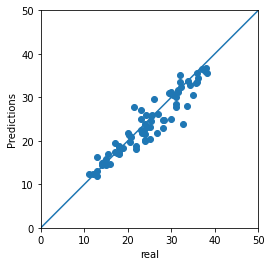

In [44]:
# plot of predictions
a = plt.axes(aspect='equal')
plt.scatter(ytest, predictions)
plt.xlabel('real')
plt.ylabel('Predictions')
lims = [0,50]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)

Text(0, 0.5, 'Count')

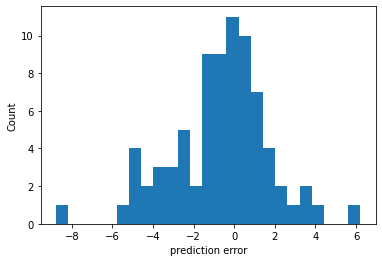

In [45]:
# plot of losses
errors = predictions - ytest
plt.hist(errors, bins=25) # hist-> frequency distribution, x labels will be continous and related 
# population of one city and plot age distribution-> histogram
# populations of multiple cities with each other-> bar chart! 
# bar chart-> count distribution, xlabels may not be related
plt.xlabel('prediction error')
plt.ylabel('Count')

In [46]:
# saved -> eported
nonlinearmodel.save('myDNNMPGregression.h5')